# Steganography with Histogram Equalization
In this notebook we show a subtle way to hide a text inside an image and how to extract it using Histogram Equalization.

## Importing necessary libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Let's load the image:

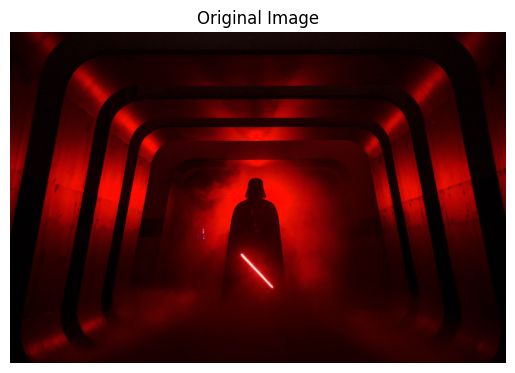

In [2]:
img = plt.imread("Darth-Vader.webp")
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

## Inserting the text:

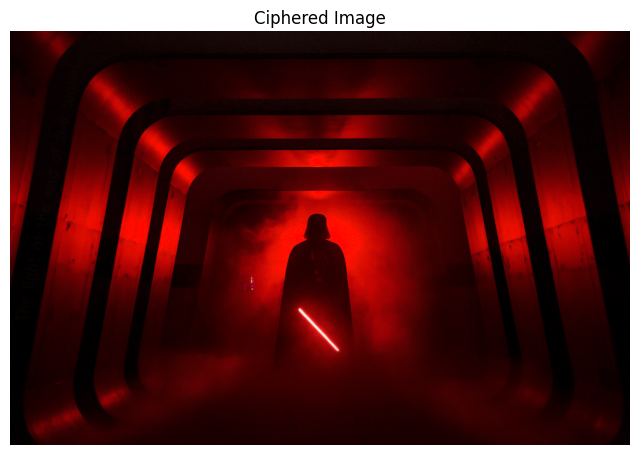

In [3]:
font = cv2.FONT_HERSHEY_SIMPLEX
org = (25, 480)
angle = 78
fontScale = 0.8
color = (5, 3, 1)
thickness = 2

raw_image = np.zeros_like(img)
cv2.putText(raw_image, "The light at the end of the tunnel.", 
            org, font, fontScale, color, thickness, cv2.LINE_AA)

M = cv2.getRotationMatrix2D(org, angle, 1)
out = cv2.warpAffine(raw_image, M, (raw_image.shape[1], raw_image.shape[0]))

ciphered = out + img
plt.figure(figsize=(8, 6))
plt.imshow(ciphered)
plt.title('Ciphered Image')
plt.axis('off')
plt.show()

## Histogram equalization:

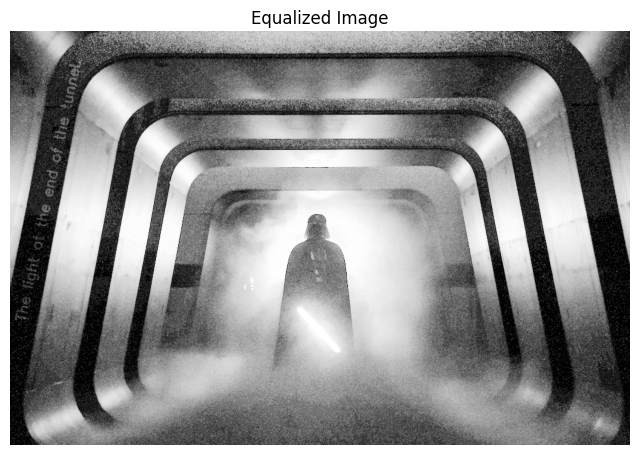

In [4]:
gray_scaled = cv2.cvtColor(ciphered, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_scaled)
plt.figure(figsize=(8, 6))
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()